# Objetivo
El objetivo de este dataset y su analisis es observar los problemas que puede ocasionar el trabajo remoto asi como la industria en la cual se ven mas reflejados estos problemas de estress y aislamiento social, la preferencia de la industria por un tipo de trabajo y alcanzar un pronostico sobre las industrias si es necesario una reincorporacion a oficinas, una incorporacion pausada de manera que sea mas facil para un trabajador trabajar de manera hibrida o si ha sido un impacto grande la creacion de espacios remotos para los trabajadores y su calidad de vida

# Hipotesis

## Hipotesis 1
¿Se tiene mas estres en trabajos de manera en sitio?

## Hipotesis 2
La edad influye en la eleccion del tipo de trabajo ya sea en oficina o en remoto
## Hipotesis 3
La industria de TI tiene mas acceso a trabajo remoto

## Hipotesis 4
La calificacion de aislamiento social es mayor en el trabajo remoto


# Descarga de Dataset

In [3]:
import os
from importlib.metadata import files

from kaggle import KaggleApi

# descarga de dataset mediante api de kaggle
api = KaggleApi()

api.authenticate()
dataset_name = "iramshahzadi9/remote-work-and-mental-health"

carpeta_destino = "./data"
os.makedirs(carpeta_destino, exist_ok=True)
ruta_completa=os.path.join(os.getcwd(), carpeta_destino)
api.dataset_download_files(dataset_name, path=carpeta_destino, unzip=True)


Dataset URL: https://www.kaggle.com/datasets/iramshahzadi9/remote-work-and-mental-health


# Carga de Dataset con Pandas


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv(carpeta_destino + "/Impact_of_Remote_Work_on_Mental_Health.csv")
df

# Nivel de Estres y tipo de trabajo

C:\Users\migue\AppData\Local\Temp\ipykernel_19576\3238523188.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, y_pivot['High'][i] + 5, str(int(y_pivot['High'][i])), ha='center', va='bottom')
C:\Users\migue\AppData\Local\Temp\ipykernel_19576\3238523188.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i + bar_width, y_pivot['Low'][i] + 5, str(int(y_pivot['Low'][i])), ha='center', va='bottom')
C:\Users\migue\AppData\Local\Temp\ipykernel_19576\3238523188.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as 

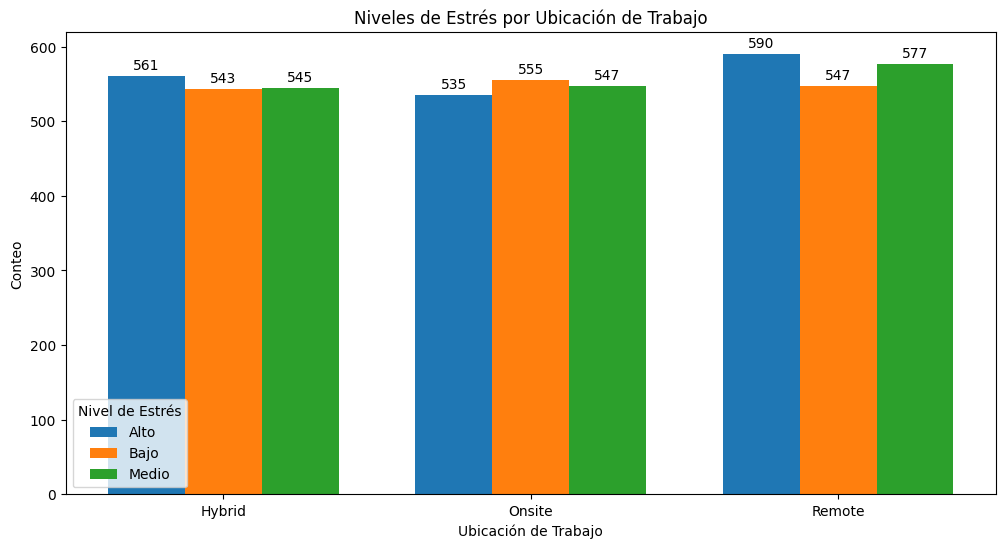

In [126]:
estress_tipotrabajo = df[["Work_Location", "Stress_Level"]]
categorias = estress_tipotrabajo["Work_Location"].unique()
y = estress_tipotrabajo.groupby(["Work_Location", "Stress_Level"]).Stress_Level.count()
y_pivot = y.unstack().fillna(0)

bar_width = 0.25
index = np.arange(len(y_pivot))

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(index, y_pivot["High"], bar_width, label="Alto")
bar2 = ax.bar(index + bar_width, y_pivot['Low'], bar_width, label='Bajo')
bar3 = ax.bar(index + 2*bar_width, y_pivot['Medium'], bar_width, label='Medio')
for i in range(len(y_pivot)):
    ax.text(i, y_pivot['High'][i] + 5, str(int(y_pivot['High'][i])), ha='center', va='bottom')
    ax.text(i + bar_width, y_pivot['Low'][i] + 5, str(int(y_pivot['Low'][i])), ha='center', va='bottom')
    ax.text(i + 2*bar_width, y_pivot['Medium'][i] + 5, str(int(y_pivot['Medium'][i])), ha='center', va='bottom')

ax.set_xlabel('Ubicación de Trabajo')
ax.set_ylabel('Conteo')
ax.set_title('Niveles de Estrés por Ubicación de Trabajo')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(y_pivot.index)
ax.legend(title='Nivel de Estrés')
plt.show()




## Conclusion de grafico
Podemos observar que la hipotesis 1 que trata sobre el estres con el tipo de trabajo es relevante ver que no se cumple ya que el mayor nivel de estres se encuentra justo en la categoria de trabajo remoto y con la conclusion que el estres no se encuentra en el trabajo en sitio sino en el remoto ademas de que podemos agregar que mayor cantidad de personas encuentran mas bajo el estres en un trabajo remoto

# Grafico de edad y ubicación de trabajo

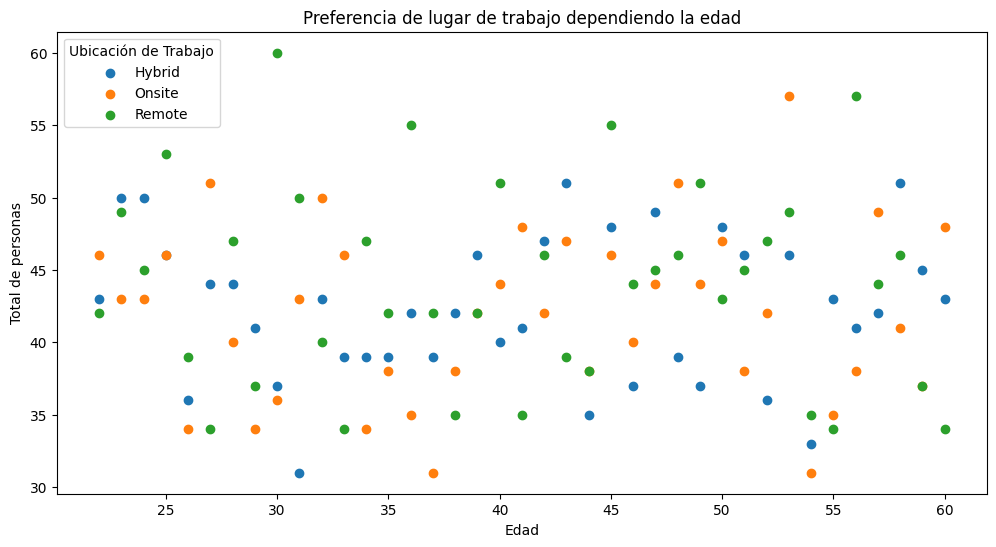

In [103]:
age_job = df[["Age","Work_Location"]]
ages = age_job.Age.unique()

amount_job = age_job.groupby(["Age", "Work_Location"]).Work_Location.count()
amount_job = amount_job.reset_index(name="Count")

plt.figure(figsize=(12, 6))
for location in amount_job["Work_Location"].unique():
    subset = amount_job[amount_job["Work_Location"] == location]
    plt.scatter(subset["Age"], subset["Count"], label=location)

plt.xlabel('Edad')
plt.ylabel('Total de personas')
plt.title('Preferencia de lugar de trabajo dependiendo la edad')
plt.legend(title='Ubicación de Trabajo')



## Conclusion de Grafico 2

En este grafico podemos apreciar la edad de las personas y la cantidad que tienen un trabjo remoto, en sitio e hibrido por lo cual podemos destacar que las personas mayores obtienen mas un empleo en sitio que lo contrario de los jovenes que mantienen un trabajo mas remoto e incluso a una edad de 30 a 35 años prefieren un trabajo remoto que un trabajo en sitio conforme va acercandose mas a la edad grande es conforme van cambiando la modalidad de trabajo

Por otra parte el grafico no nos puede asegurar que la preferencia sea esa ya que la informacion que tenemos es sobre personas que ya tienen sus empleos asi
podemos intuir que asi lo eligieron pero no asegurar que esa fue su preferencia


# Grafica De Industria y lugar de trabajo

C:\Users\migue\AppData\Local\Temp\ipykernel_19576\2733759927.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, count_industries_pivot['Hybrid'][i] + 5, str(int(count_industries_pivot['Hybrid'][i])), ha='center', va='bottom')
C:\Users\migue\AppData\Local\Temp\ipykernel_19576\2733759927.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i + bar_width, count_industries_pivot['Onsite'][i] + 5, str(int(count_industries_pivot['Onsite'][i])), ha='center', va='bottom')
C:\Users\migue\AppData\Local\Temp\ipykernel_19576\2733759927.py:17: FutureWarning: Series.__getitem__ treating keys as positions is de

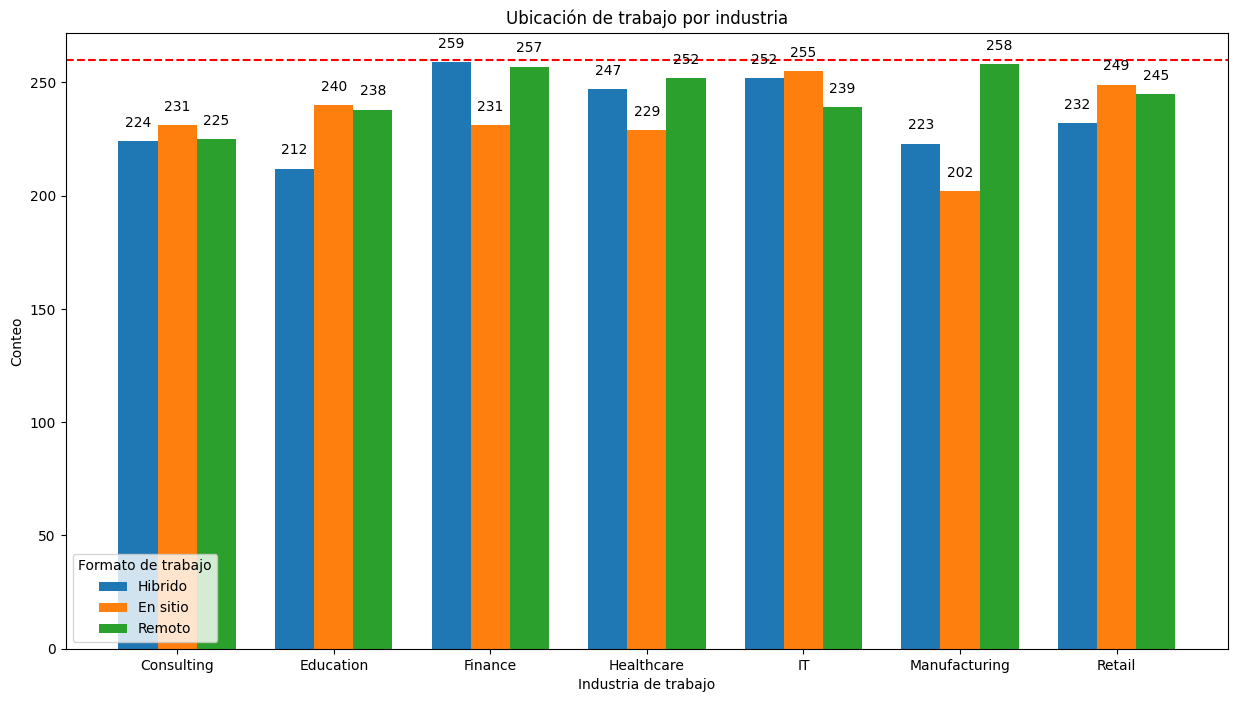

In [125]:
industry_jobs = df[["Industry","Work_Location"]]
industry = industry_jobs.Industry.unique()

count_industries = industry_jobs.groupby(["Industry", "Work_Location"]).Work_Location.count()
count_industries_pivot = count_industries.unstack()
bar_width = 0.25
index = np.arange(len(count_industries_pivot))

fig, ax = plt.subplots(figsize=(15, 8))
bar1 = ax.bar(index, count_industries_pivot["Hybrid"], bar_width, label="Hibrido")
bar2 = ax.bar(index + bar_width, count_industries_pivot['Onsite'], bar_width, label='En sitio')
bar3 = ax.bar(index + 2*bar_width, count_industries_pivot['Remote'], bar_width, label='Remoto')

for i in range(len(count_industries_pivot)):
    ax.text(i, count_industries_pivot['Hybrid'][i] + 5, str(int(count_industries_pivot['Hybrid'][i])), ha='center', va='bottom')
    ax.text(i + bar_width, count_industries_pivot['Onsite'][i] + 5, str(int(count_industries_pivot['Onsite'][i])), ha='center', va='bottom')
    ax.text(i + 2*bar_width, count_industries_pivot['Remote'][i] + 5, str(int(count_industries_pivot['Remote'][i])), ha='center', va='bottom')

ax.set_xlabel('Industria de trabajo')
ax.set_ylabel('Conteo')
ax.set_title('Ubicación de trabajo por industria')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(count_industries_pivot.index)
ax.legend(title='Formato de trabajo')
ax.axhline(y=260, color='r', linestyle='--')
plt.show()




## Conclusion de grafico 3
En este grafico podemos observar que al parecer el trabajo remoto no es mas favorecido en la industria de TI sino que en otras industrias es mas visible aunque en este dataset no podemos demostrar eso ya que la cantidad de personas de cada industria es diferente y no es igual por lo cual entre mas gente haya en una industria mas probabilidad es de que haya un sesgo de informacion por lo tanto este grafico solo demuestra la situacion en la que se encuentran las personas entrevistadas

pero podemos concluir de que la industria con mas trabajo remoto es la Manufacturera seguido por la de finazas y al 5 lugar podemos encontrar la industria de TI de este grupo de personas.